# Load in the  stuff

In [36]:
os.listdir()

['.ipynb_checkpoints',
 'ARI_consistency_test.py',
 'data',
 'random_dropout.py',
 'models',
 'MSMC-Exploratory-Analysis',
 'Todo.docx',
 'downstream_analysis.py',
 'test_case_data',
 'jupyterthemes_editor.ipynb',
 'many_tests.py',
 'MSMC_clustering',
 'MSMC_clustering.py',
 'requirements.txt',
 'msmc_meta_data',
 'many_tests_interpolated_normalized_transformed_data.py',
 'Species_specific_traits_paper_analysis',
 'Silhouette_analysis.py',
 '__pycache__']

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.barycenters import dtw_barycenter_averaging
from sklearn.metrics import adjusted_rand_score

# Load in the weird stuff
# sorry ab the stuff
import_path = "/scratch/nick/MSMC-Curve-Analysis/"
og_path = "/scratch/nick/MSMC-Curve-Analysis/Species_specific_traits_paper_analysis/data"
os.chdir(import_path)
import downstream_analysis
from downstream_analysis import plot_cluster_table
os.chdir('/scratch/nick/MSMC-Curve-Analysis/")
# os.chdir('/scratch/nick/MSMC-Curve-Analysis/MSMC_clustering/') # Better more updated version
from MSMC_clustering import Msmc_clustering
os.chdir(og_path)

# Load in list files to omit if desired
file = open("../../MSMC-Exploratory-Analysis/results/lists/omit_test_lenient.txt", "r")
data = file.read()
to_omit_list = data.split('\n')
to_omit_list_interpolated = [i+".interpolated" for i in to_omit_list]

In [2]:
print('j')
# os.chdir(og_path)

j


## Data from Species-Specific Traits Paper

In [2]:
SSTP_263_spe_name_df = pd.read_csv('263.spe.name.txt', sep="\t", names = ["id", "latin", "short"])
SSTP_Normalized_Ne_Full_Time_Period_equidistant_time_points = pd.read_csv("Normalized_Ne_Full_Time_Period_equidistant_time_points.csv",
                                                                          header=0)
SSTP_clusters_different_k = pd.read_csv("clusters_different_k.csv", header=0)
SSTP_B10K_Trait_Dthatata_031319 = pd.read_csv("B10K_Trait_Data_031319.csv", header=0)

# Make tables/dicts necessary for plotting from paper data
cluster_ts_dict = dict() # maps sample IDs to time series
fields = SSTP_Normalized_Ne_Full_Time_Period_equidistant_time_points.columns
for idx, loc_key in enumerate(SSTP_Normalized_Ne_Full_Time_Period_equidistant_time_points.index):
    ID = SSTP_Normalized_Ne_Full_Time_Period_equidistant_time_points.iloc[idx]["ID"]
    cluster_ts_dict[ID] = SSTP_Normalized_Ne_Full_Time_Period_equidistant_time_points.iloc[idx][fields[1:]].to_numpy()

label_tables = dict() # key=cluster number, value=cluster_label_dict
all_ks = [int(i[-1]) for i in SSTP_clusters_different_k.columns[1:]] # All the Ks used for clustering in paper
for k in all_ks:
    cluster_label_dict= dict() # Maps sample IDs to  corresponding cluster labels
    for idx, loc_key in enumerate(SSTP_clusters_different_k.index):
        cluster_label_dict[SSTP_clusters_different_k.iloc[idx]["ID"]]=SSTP_clusters_different_k.iloc[idx][f"K={k}"]
    label_tables[k] = cluster_label_dict


# Evaluating Performance of Trimming Data Before Normalization
Works well!

In [3]:
# Control settings with default data
msmc_path = "../../"
os.chdir(msmc_path)
regular_msmc_obj = Msmc_clustering(directory="msmc_curve_data/", 
                                   friendly_note=False,
                                   mu=, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=7,
                                   algo='kmeans',
                                   sep='\t',
                                   time_window=[11700, 2.58E6])
os.chdir(og_path)
# regular_msmc_obj.cluster_curves(omit_front=0, 
#                                 omit_back=0, 
#                                 cols=3,  
#                                 fs_x=60, 
#                                 fs_y=20,
#                                 metric="dtw")

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
.txt type:  <class 'str'>

read_file summary:
omit_front_prior=0
omit_back_prior=0

we got a window
before: 238
after: 238


In [12]:
os.chdir('nick/MSMC-Curve-Analysis')

In [4]:
# os.chdir(msmc_path)
Msmc_clustering_series_interpolator(interpolation_pts=100,
                                    kind="linear",
                                    write_to_dir="msmc_curve_data_pleistocene_window_interpolated_100pts/",
                                    file_descriptor='.pleistocene_window.interpolated_100pts.tsv',
                                    msmc_obj = regular_msmc_obj)

NameError: name 'Msmc_clustering_series_interpolator' is not defined

In [1]:
# Clipping off first and last 10 points before transformation seems to
# positively affect clusters
msmc_path = '/scratch/nick/MSMC-Curve-Analysis/'
os.chdir(msmc_path)
regular_msmc_obj_oo = Msmc_clustering(directory="msmc_curve_data/", 
                                   friendly_note=False,
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=7,
                                   algo='kmeans',
                                      
                                   sep='\t',
                                   omit_front_prior=10,
                                   omit_back_prior=10)
regular_msmc_obj_oo.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw")
os.chdir(og_path)

NameError: name 'os' is not defined

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
.txt type:  <class 'str'>

read_file summary:
omit_front_prior=10
omit_back_prior=10

cleanSeries_with_df: 238,
mySeries: 238
len of series in mySeries: 44
Clustering 44/44
Omitting 0 points from front and 0 from back
kmeans dtw
type of cleanSeries <class 'numpy.ndarray'>
Number of flat time series curves: 12
Computed dists of shape: (238, 238)
<class 'tslearn.clustering.kmeans.TimeSeriesKMeans'>
sample len: 238
label len: 238
num to plot : 5
curve cluster plot shape: (2, 3)


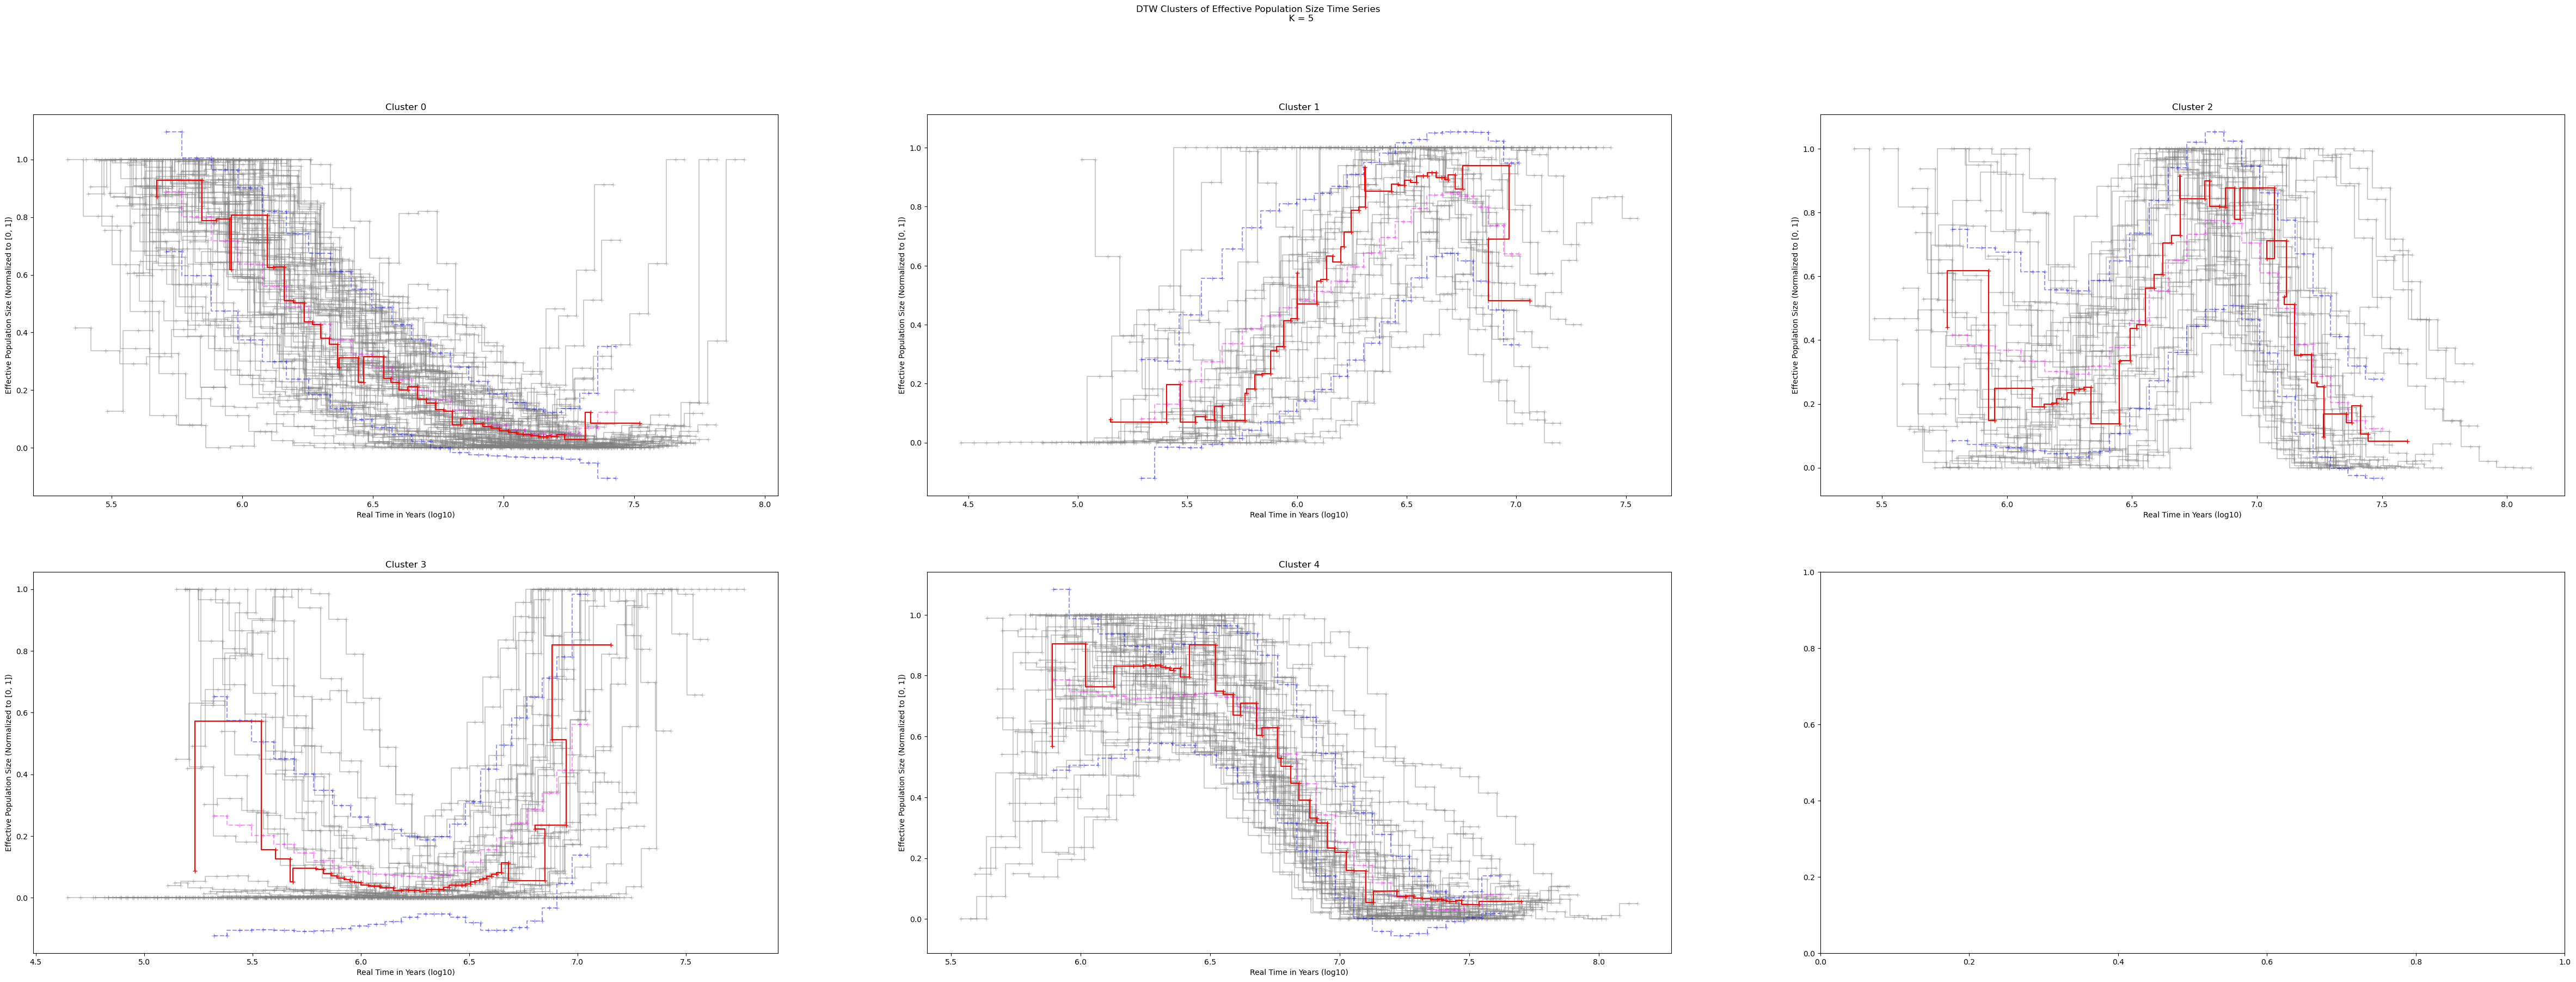

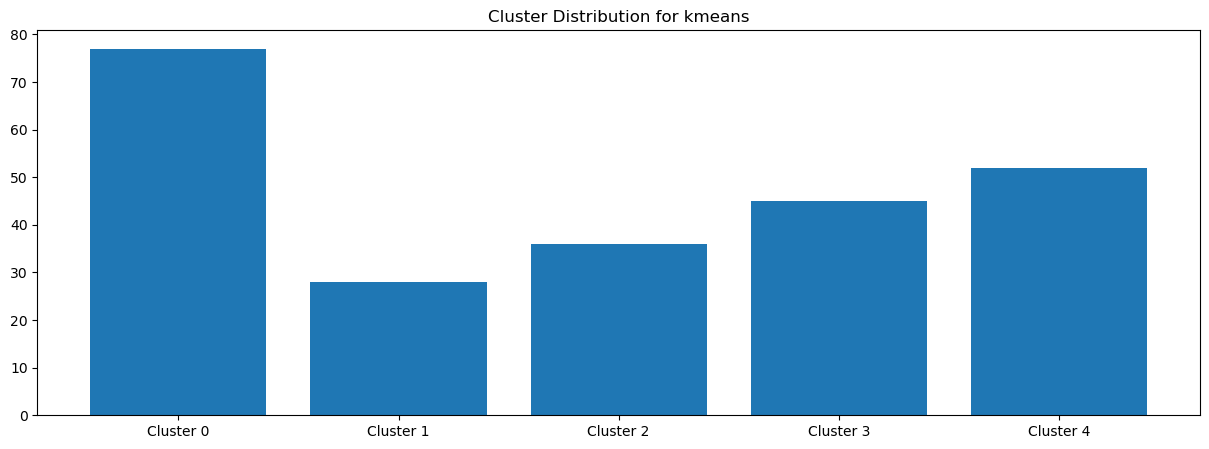

DID I CLOSE THE PLOT??? PLEASE TELL ME I DID!


In [56]:
# Clipping off first and last 10 points before transformation seems to
# positively affect clusters
msmc_path = '/scratch/nick/MSMC-Curve-Analysis/'
os.chdir(msmc_path)
regular_msmc_obj_oo = Msmc_clustering(directory="msmc_curve_data/", 
                                   friendly_note=False,
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=5,
                                   algo='kmeans',
                                   sep='\t',
                                   omit_front_prior=10,
                                   omit_back_prior=10)
regular_msmc_obj_oo.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw")
os.chdir(og_path)

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
.txt type:  <class 'str'>

read_file summary:
omit_front_prior=10
omit_back_prior=30

cleanSeries_with_df: 238,
mySeries: 238
len of series in mySeries: 24
Clustering 24/24
Omitting 0 points from front and 0 from back
kmeans dtw
type of cleanSeries <class 'numpy.ndarray'>
Number of flat time series curves: 12
Computed dists of shape: (238, 238)
<class 'tslearn.clustering.kmeans.TimeSeriesKMeans'>
sample len: 238
label len: 238
num to plot : 7
curve cluster plot shape: (3, 3)


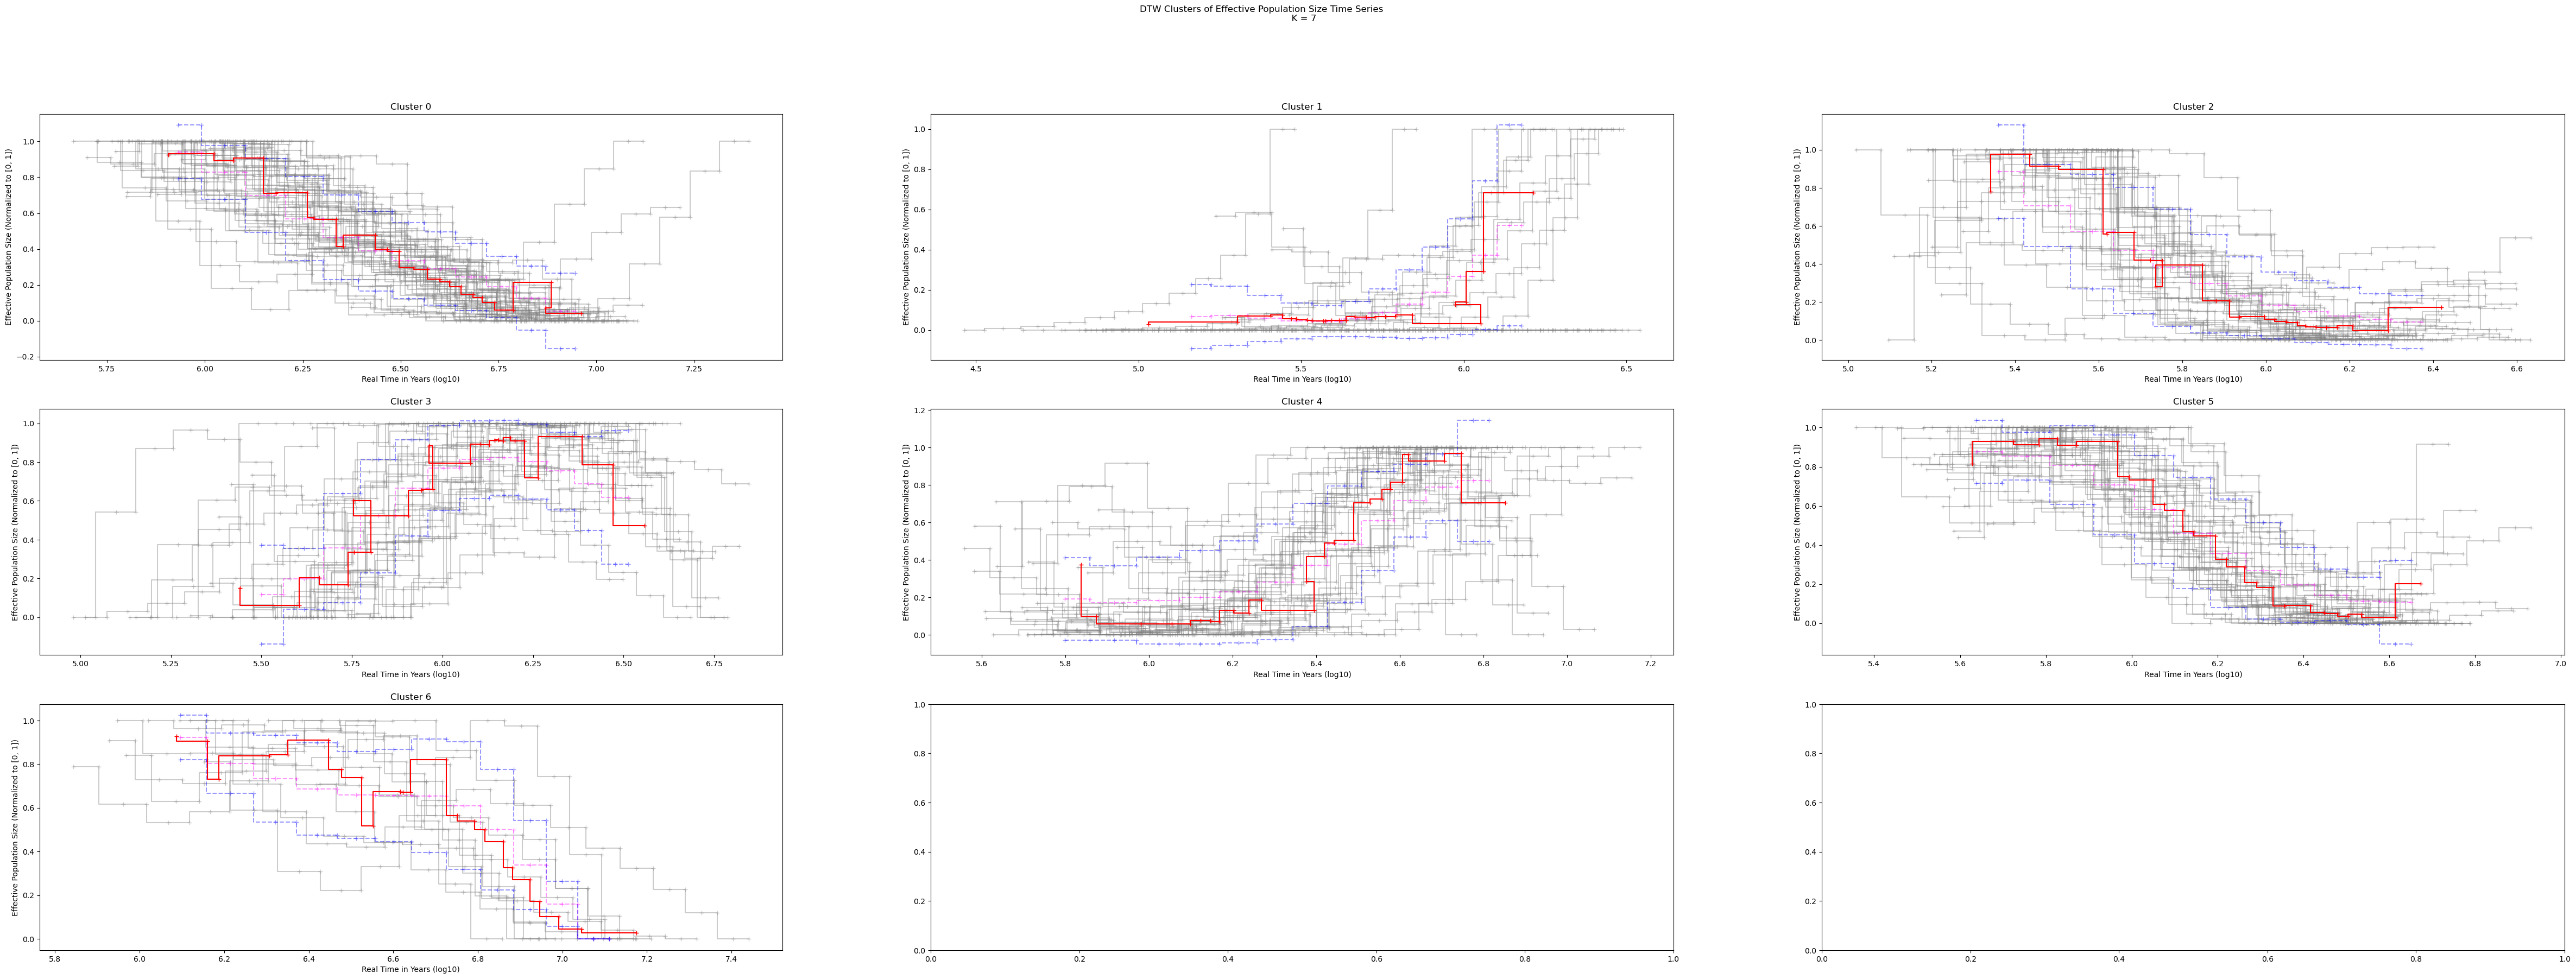

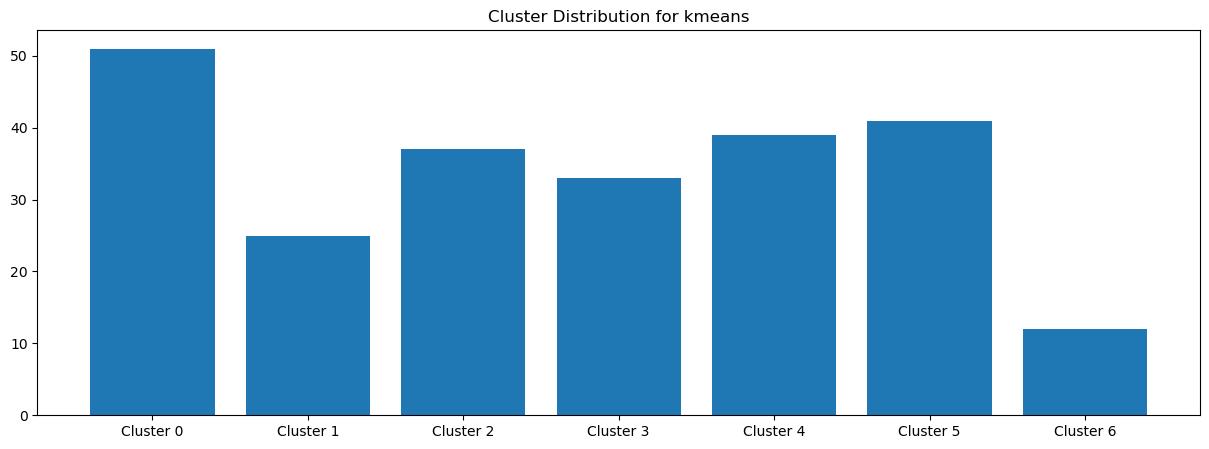

DID I CLOSE THE PLOT??? PLEASE TELL ME I DID!


In [5]:
'''
Try clustering on time window of the Early to Late Pleistoscene
11.7 kya - 2.58 mya --(log scaled)--> 4.068 - 6.416 
For now I have to eyeball the points making up the window,
I might make a function for finding the window given a desired year range.

Result of my caveman-ish way of narrowing the window: Not good

Idea for new function:
Perform trimming of data points to desired time window, then perform data
transformation. We will then have timeseries of unequal lengths. Interpolate
the "windowed" and transformed data and store it somewhere. Then we can perform
clustering on the "windowed", transformed, and interpolated data!

Current issue with arbitrary point cut off that we currently have: Too many 
important time points are indiscriminantly trimmed off.
'''
msmc_path = '/scratch/nick/MSMC-Curve-Analysis/'
os.chdir(msmc_path)
regular_msmc_obj_oo = Msmc_clustering(directory="msmc_curve_data/", 
                                   friendly_note=False,
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=7,
                                   algo='kmeans',
                                   sep='\t',
                                   omit_front_prior=10,
                                   omit_back_prior=30)
regular_msmc_obj_oo.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw")
model_name = 'birds_regular_omit_f10_b30_k7'
os.chdir(og_path)

In [15]:
path = '../../models'
os.listdir(path)
regular_msmc_obj_oo.km.to_pickle(path+)

TimeSeriesKMeans(dtw_inertia=True, max_iter=100, metric='dtw', n_clusters=7,
                 random_state=205, verbose=False)

In [82]:
def seriesWindow(df, by, upperbound, lowerbound):
    '''
    Truncates pandas df to desired start and stop bounds by a designated
    field
    '''
    index = (df[by] < upperbound) & (df[by] > lowerbound)
    return df.loc[index]

def windowMySeries(mySeries, **kwargs):
    '''
    seriesWindow wrapper function.
    
    Takes in a list of time series dataframes and returns a truncated version 
    of that list of time series dataframes. Truncation is performed with
    seriesWindow function which takes in dataframes, a field to truncate by,
    an upperbound on the field, and a lowerbound on the field.
    '''
    windowedSeries = []
    for df in mySeries:
        windowedSeries.append(seriesWindow(df, **kwargs))
    return windowedSeries
    


In [35]:
ws = windowMySeries(mySeries=regular_msmc_obj.mySeries,
                    by='left_time_boundary',
                    upperbound=6,
                    lowerbound=4)

NameError: name 'windowMySeries' is not defined

# Interpolating stuff

In [14]:
from scipy import interpolate
'''
KEY STEP: Following code makes dirs of interpolated time series data

Extremely huge:
https://towardsdatascience.com/how-to-interpolate-time-series-data-in-apache-spark-and-python-pandas-part-1-pandas-cff54d76a2ea

Possible interpolation procedure:
- For each timeseries, pick out a min, max time window like in Paper (ex: 1E5 to 1E7 years ago)
- Use a linspace on x.min and x.max for some desired number of points (this is pretty much guranteed to evenly space x-axis)
    - This makes newx
- Use 1d interpolation on x, y. Choose whatever kind u like (linear, cubic, whatever)
    - This makes newy
    
Write interpolated data to a dir
'''
    
def Msmc_clustering_series_interpolator(interpolation_pts=200,
                                        kind="linear",
                                        write_to_dir="msmc_curve_data_interpolated/",
                                        file_descriptor='.interpolated.tsv',
                                        msmc_obj = None,
                                        **Msmc_clustering_kwargs):
    '''
    ALMOST GOOD TO PUT INTO FILE, JUST NEED TO UNHARDCODE SOME STUFF! (left_time_boundary things)
    
    This function uses the Msmc_clustering class to read in uninterpolated MSMC
    data, interpolates that data, and exports the interpolated data to a 
    specified directory (write_to_dir). Interpolated data files will have a
    specified file descriptor. Interpolated data will be tab separated in the
    same style as raw MSMC2 output data, see description of fields below:
    
    Interpolated data will feature the same fields as 
    Msmc_clustering.mySeries (list of dataframes).
    Dataframe has:
    1.) time_index (optional)
    2.) left_time_boundary
    3.) right_time_boundary (optional)
    4.) lambda
    
    This function is location sensitive. Make sure you have a clear path to 
    the data you seek to interpolate.
    
    ex:
    Msmc_clustering_series_interpolator(interpolation_pts=100,
                                        kind="linear",
                                        write_to_dir="msmc_curve_data_100_pts_interpolated/",
                                        file_descriptor='.100pts_interpolated.tsv',
                                        directory="msmc_curve_data/", 
                                        friendly_note=False,
                                        mu=1.4e-9, 
                                        generation_time_path='generation_lengths/', 
                                        real_time=False, 
                                        to_omit=[],
                                        normalize_lambda=False, 
                                        log_scale_time=False, 
                                        plot_on_log_scale=False, 
                                        exclude_subdirs=["Archive", "mammals_part_1"], 
                                        manual_cluster_count=7,
                                        algo='kmeans',
                                        sep='\t')
    
    Note about interoplating transformed data: If you are interpolating
    transformed data, make sure that the appropriate flags for real_time,
    normalize_lambda, log_scale_time, and plot_on_log_scale are set. 
    
    Scenario A: 
    If data is just raw MSMC2 output data (scaled coalescent time and 
    unnormalized lambda) all these flags can be set to True.
    
    Scenario B: 
    If data is scaled to real time and Ne, all these flags can be set to False.
    '''
    if not isinstance(msmc_obj, Msmc_clustering):
        msmc_obj = Msmc_clustering(**Msmc_clustering_kwargs)
    # Interpolate stuff here
    name2series_interpolated = dict() # key: Latin name, val: interpolated time series
    print(f"Writing {len(msmc_obj.mySeries)} interpolated files")
    for i in range(len(msmc_obj.mySeries)): # Iterate through series indices in msmc_obj
        name = msmc_obj.namesofMySeries[i] # Find name from index
        df = msmc_obj.name2series[name] # Find series from name
        time_index = range(1, interpolation_pts+1) # Create an index for timeseries
        x = df['left_time_boundary']
        y = df['lambda']
        right_time_boundary = np.zeros(interpolation_pts)
        f = interpolate.interp1d(x, y, kind=kind) # Craete interpolation function
        newx = np.linspace(x.min(), x.max(), interpolation_pts) # Create interpolated x
        newy = f(newx) # Create interpolated y
        df_raw = pd.DataFrame(data=zip(time_index, newx, right_time_boundary, newy),
                                                      columns = ['time_index', 'left_time_boundary', 'right_time_boundary', 'lambda'])
        name2series_interpolated[name] = df_raw.set_index('time_index')
    #     plt.step(newx, newy, '|', label='linear interp')
    #     plt.show()
    # Write allat to csv files with appropriate names
    pathlist = write_to_dir.split('/')[:-1]
    new_dir = '/'.join(pathlist[-1:])
    new_path = '/'.join(pathlist[:-1])
    if len(new_path) == 0:
        new_path ='./'
    print(f"new_dir: {new_dir}")
    print(f"new_path: {new_path}")
    if new_dir not in os.listdir(new_path):
        os.mkdir(write_to_dir)
    for key, val in list(name2series_interpolated.items()):
        path = write_to_dir + '/' + key + file_descriptor
        val.to_csv(path_or_buf=path, sep='\t')
    return

In [16]:
'''
This code cell makes a dir containing data with 100 interpolated points
'''
os.chdir(msmc_path)
Msmc_clustering_series_interpolator(interpolation_pts=100,
                                    kind="linear",
                                    write_to_dir="msmc_curve_data_100_pts_interpolated/",
                                    file_descriptor='.100pts_interpolated.tsv',
                                    directory="msmc_curve_data/",  # Everything below this are Msmc_clustering obj params
                                    friendly_note=False,
                                    mu=1.4e-9, 
                                    generation_time_path='generation_lengths/', 
                                    real_time=False, 
                                    to_omit=[],
                                    normalize_lambda=False, 
                                    log_scale_time=False, 
                                    plot_on_log_scale=False, 
                                    exclude_subdirs=["Archive", "mammals_part_1"], 
                                    manual_cluster_count=7,
                                    algo='kmeans',
                                    sep='\t')
os.chdir(og_path)

NameError: name 'Msmc_clustering_series_interpolator' is not defined

## Testing omit_front_prior and omit_back_prior (prior to saving to mySeries) with interpolated data:
I hope to get pass the weird elbow curves which I think are a side effect of inverting scaled MSMC2 input which are near 0.

In [31]:
os.chdir('/scratch/nick/MSMC-Curve-Analysis')

In [32]:
os.listdir()

['.ipynb_checkpoints',
 'msmc_curve_data_interpolated',
 'ARI_consistency_test.py',
 'data',
 'argparseex.py',
 'generation_lengths',
 'random_dropout.py',
 'zips',
 'msmc_curve_data_realtimeprocessed_and_interpolated',
 'msmc_curve_data_realtimeprocessed_and_interpolated.zip',
 'msmc_curve_data_pleistocene_window_interpolated_100pts',
 'models',
 'MSMC-Exploratory-Analysis',
 'generation_lengths.zip',
 'Todo.docx',
 'downstream_analysis.py',
 'jupyterthemes_editor.ipynb',
 'ucr_ts_data',
 'many_tests.py',
 'random_dropout2.py',
 'msmc_curve_data_100_pts_interpolated',
 'random_dropout3.py',
 'MSMC_clustering.py',
 'UCRArchive_2018',
 'msmc_curve_data',
 'requirements.txt',
 'msmc_meta_data',
 'many_tests_interpolated_normalized_transformed_data.py',
 'Species_specific_traits_paper_analysis',
 'Silhouette_analysis.py',
 '__pycache__']

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
.tsv type:  <class 'str'>

read_file summary:
omit_front_prior=5
omit_back_prior=10

cleanSeries_with_df: 238,
mySeries: 238
len of series in mySeries: 85
Clustering 85/85
Omitting 0 points from front and 0 from back
kmeans euclidean
type of cleanSeries <class 'numpy.ndarray'>
Number of flat time series curves: 16
Using stock pairwise distance metric
Computed dists of shape: (238, 238)
<class 'tslearn.clustering.kmeans.TimeSeriesKMeans'>
sample len: 238
label len: 238
num to plot : 7
curve cluster plot shape: (4, 2)


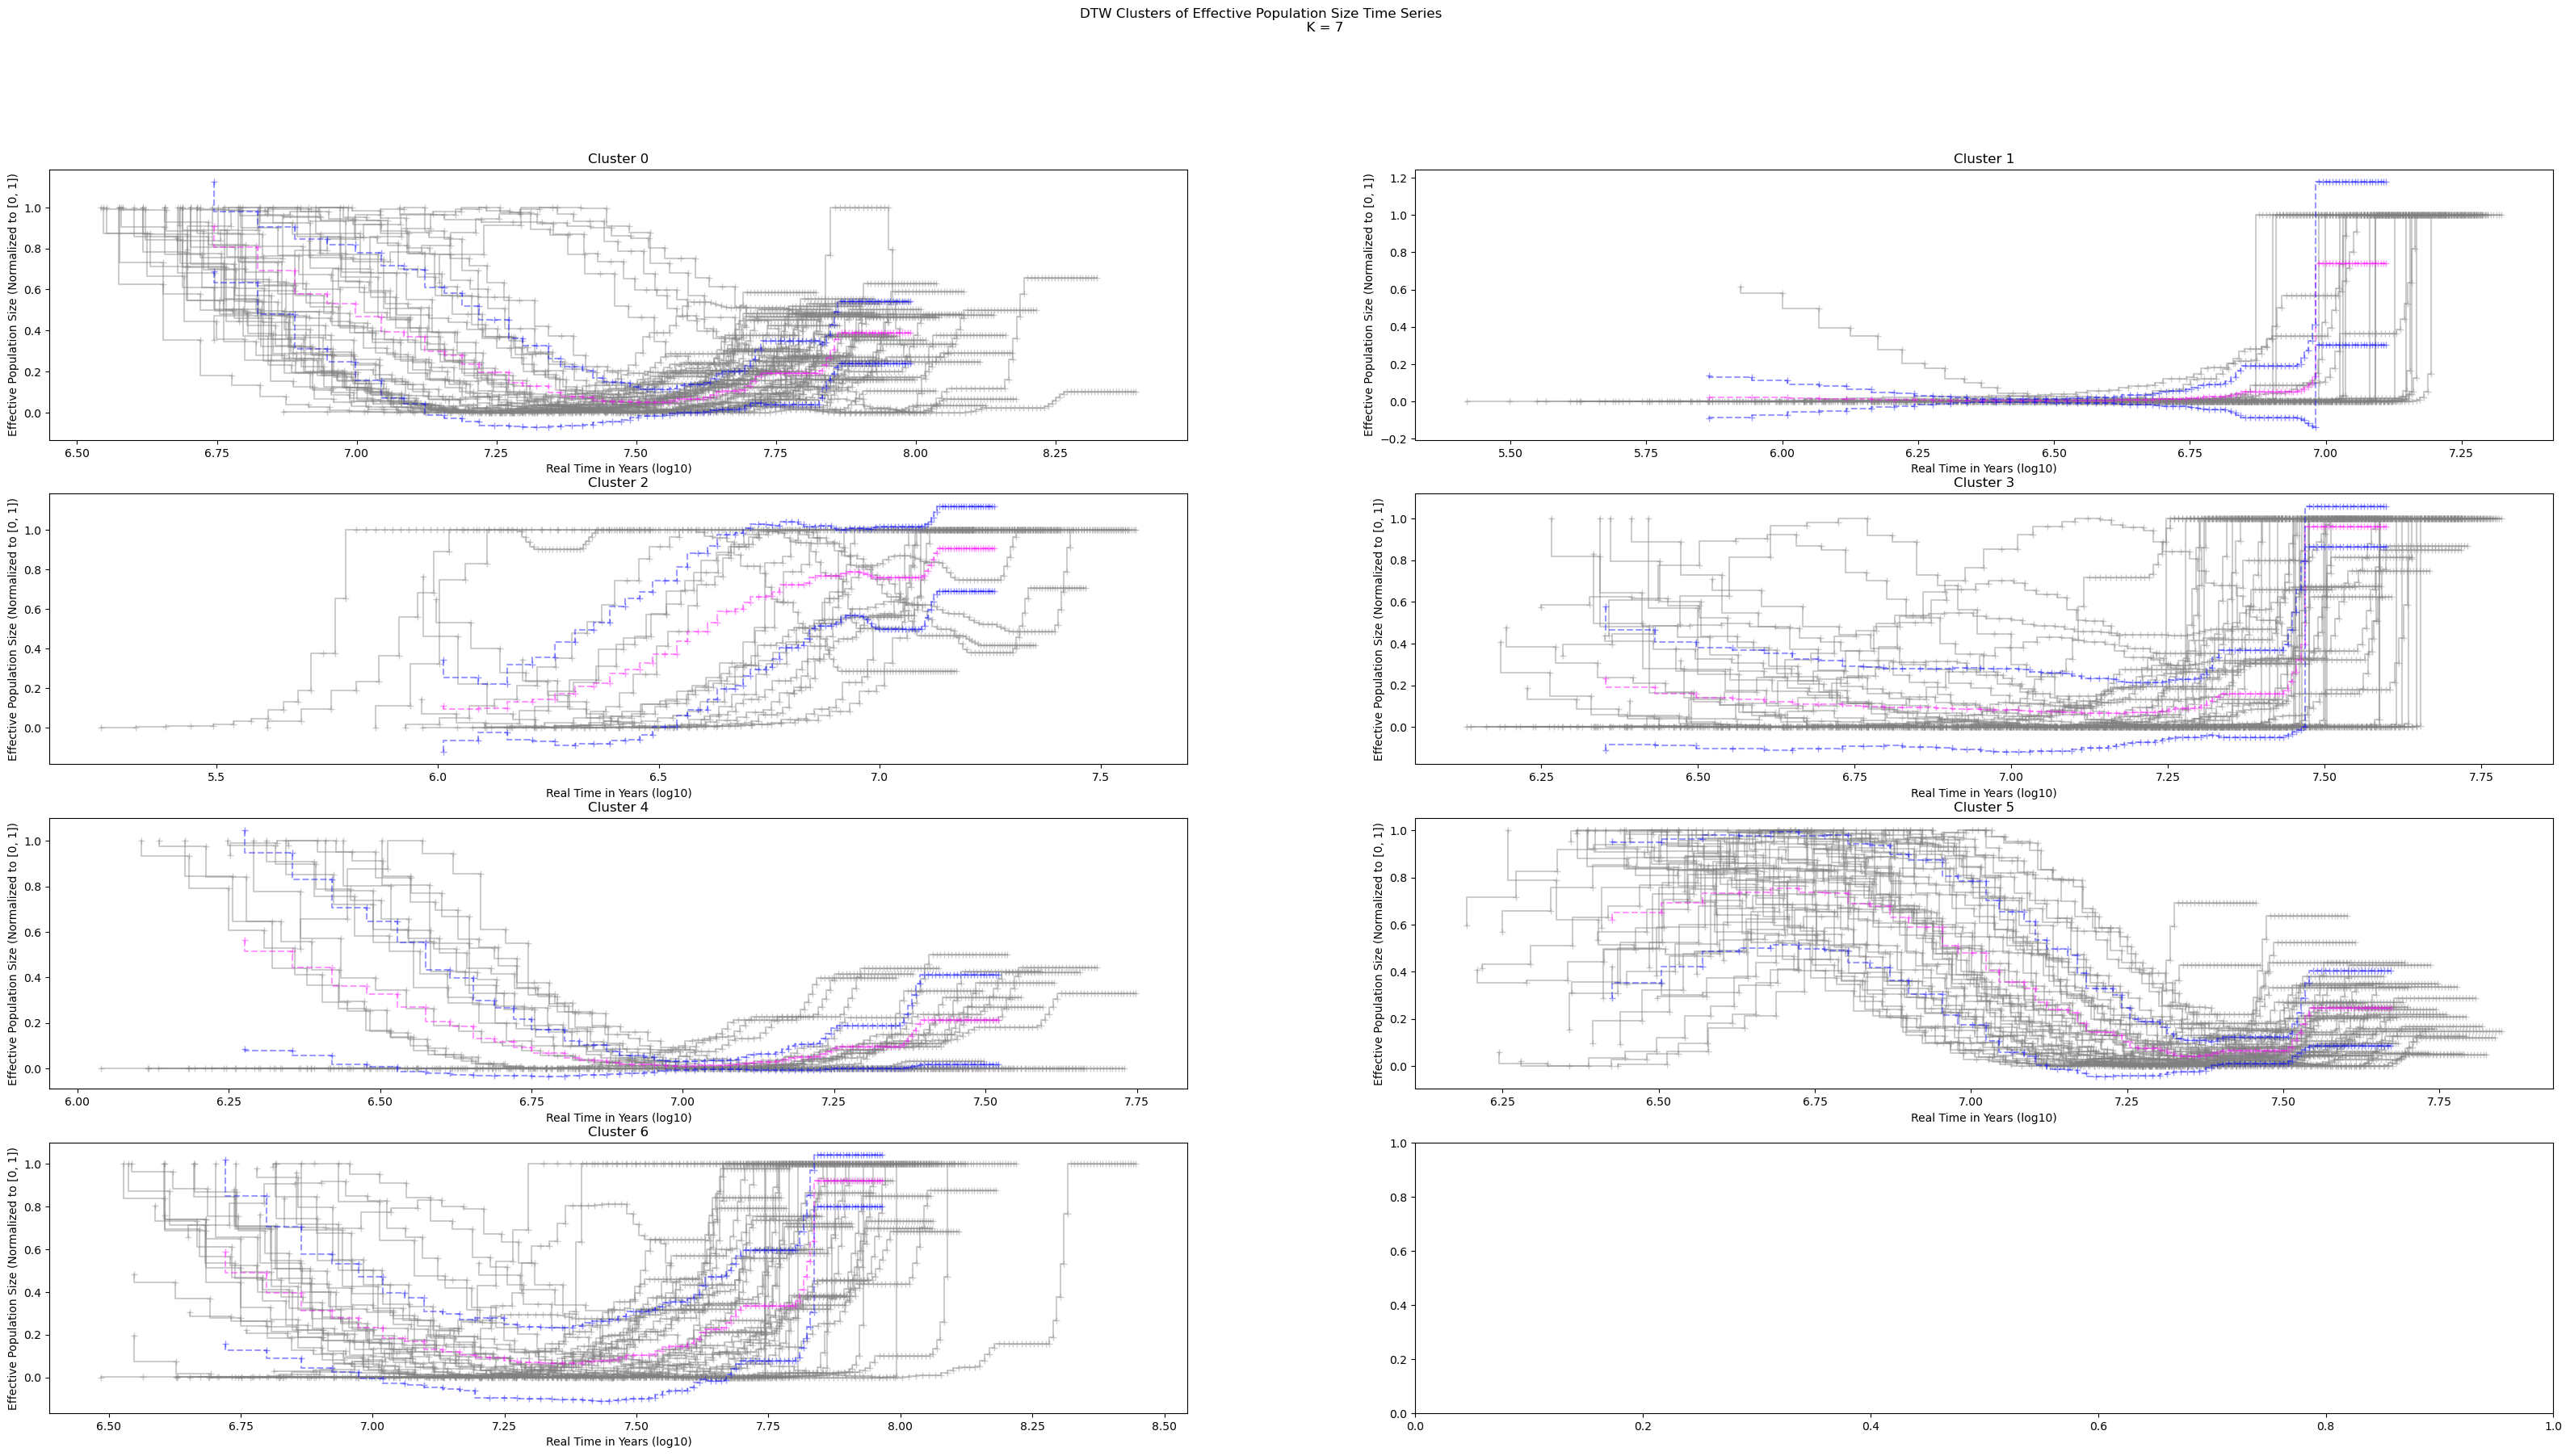

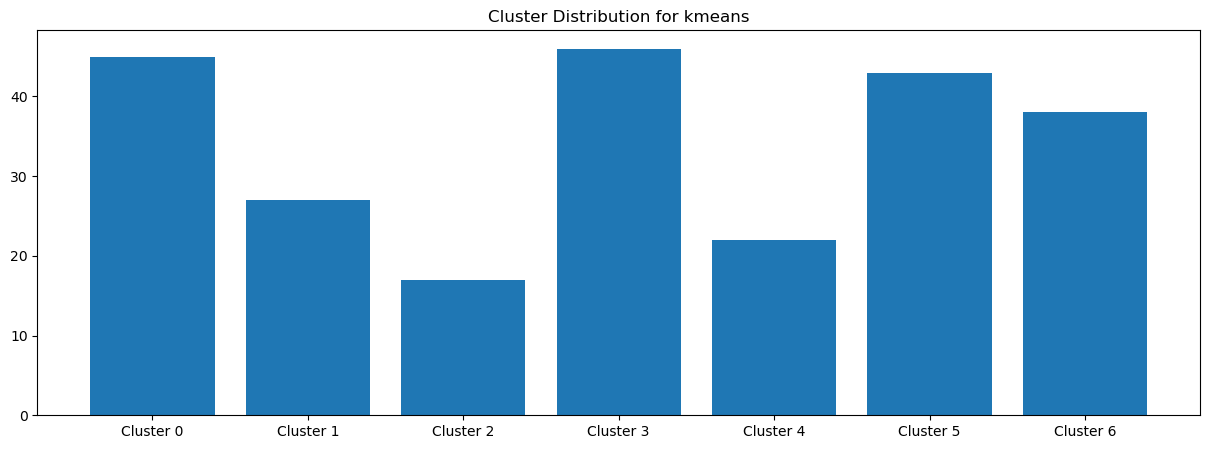

DID I CLOSE THE PLOT??? PLEASE TELL ME I DID!


In [34]:
# Kinda split samples by increase and decrease during ~pleistocene window
# msmc_path = "../../"
# os.chdir(msmc_path)
interpolated_msmc_obj = Msmc_clustering(directory="msmc_curve_data_100_pts_interpolated/", 
                                   friendly_note=False,
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=[''], 
                                   manual_cluster_count=7,
                                   algo='kmeans',
                                   sep='\t',
                                   suffix='.tsv',
                                   omit_front_prior=5,
                                   omit_back_prior=10)
# os.chdir(og_path)
interpolated_msmc_obj.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=2,  
                                fs_x=40, 
                                fs_y=20,
                                metric="euclidean",
                                plot_iceages=False,
                                plot_barycenters=False)
# Most shapely curves if I do say so myself

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
.tsv type:  <class 'str'>

read_file summary:
omit_front_prior=10
omit_back_prior=100

cleanSeries_with_df: 238,
mySeries: 238
len of series in mySeries: 90
Clustering 90/90
Omitting 0 points from front and 0 from back
kmeans dtw
type of cleanSeries <class 'numpy.ndarray'>
Number of flat time series curves: 0
Computed dists of shape: (238, 238)
<class 'tslearn.clustering.kmeans.TimeSeriesKMeans'>
sample len: 238
label len: 238
num to plot : 4
curve cluster plot shape: (2, 2)


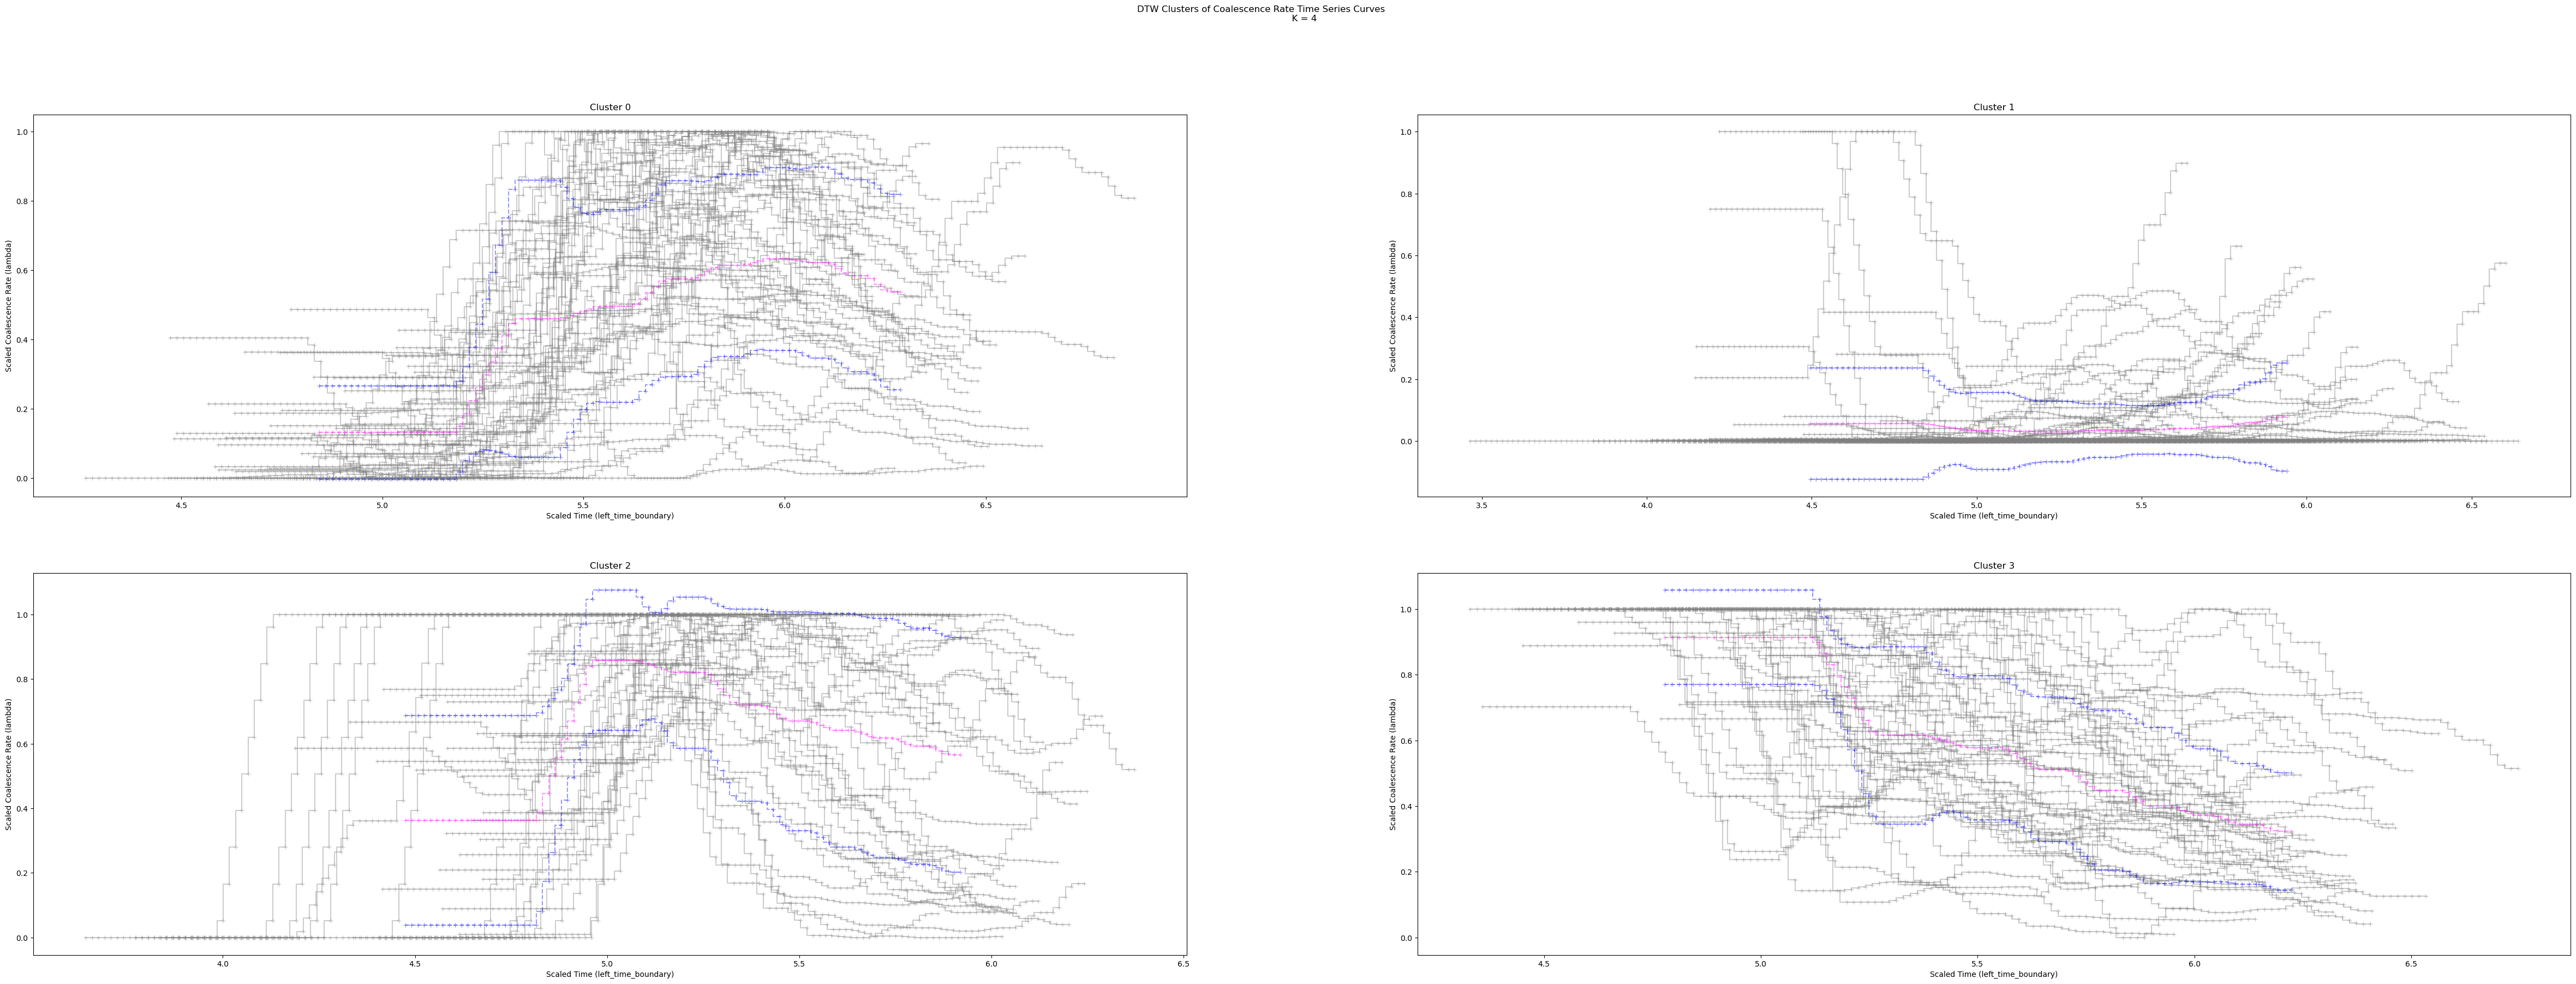

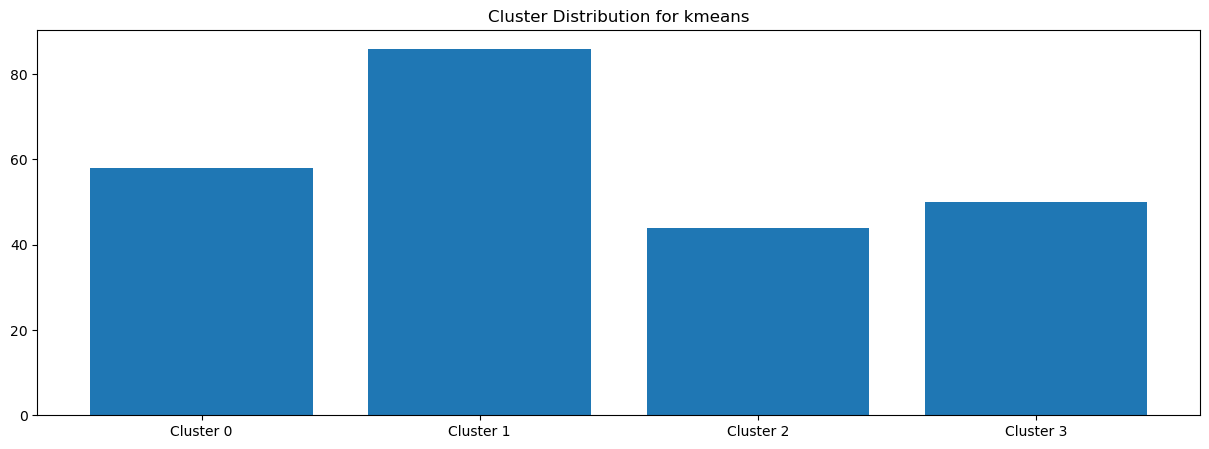

DID I CLOSE THE PLOT??? PLEASE TELL ME I DID!


In [46]:
# Cut samples into windows during ~pleistocene 
msmc_path = "../../"
os.chdir(msmc_path)
interpolated_msmc_obj = Msmc_clustering(directory="msmc_curve_data_realtimeprocessed_and_interpolated/", 
                                   friendly_note=False,
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=False, 
                                   to_omit=[],
                                   normalize_lambda=False, 
                                   log_scale_time=False, 
                                   plot_on_log_scale=False, 
                                   exclude_subdirs=[''], 
                                   manual_cluster_count=4,
                                   algo='kmeans',
                                   sep='\t',
                                   suffix='.tsv',
                                   omit_front_prior=10,
                                   omit_back_prior=100)
os.chdir(og_path)
interpolated_msmc_obj.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=2,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw",
                                plot_iceages=False,
                                plot_barycenters=False)
# Most shapely curves if I do say so myself

## Clusters from Paper

In [47]:
msmc_path = "../../"
os.chdir(msmc_path)
# NOTE:
# Data is already in real time, so MSMC conversion
msmc_obj_on_paper_raw_data_euclidean = Msmc_clustering(directory="Species_specific_traits_paper_analysis/data/Ne_Data_All_Species/", 
                                             mu=1.4e-9, 
                                             generation_time_path='generation_lengths/', 
                                             real_time=False, 
                                             to_omit=[],
                                             normalize_lambda=True, 
                                             log_scale_time=True, 
                                             plot_on_log_scale=True, 
                                             exclude_subdirs=["Archive", "mammals_part_1"], 
                                             manual_cluster_count=7,
                                             algo='kmeans',
                                             sep='\t',
                                             skiprows=1,
                                             header=None,
                                             names=["left_time_boundary", "lambda"])
msmc_obj_on_paper_raw_data_euclidean.cluster_curves(omit_front=0, 
                                          omit_back=40, 
                                          cols=3,  
                                          fs_x=60, 
                                          fs_y=20,
                                          metric="euclidean")
os.chdir(og_path)

FRIENDLY NOTE if getting err while reading data for Msmc_clustering:
 By default, Msmc_clustering reads data from directory: Species_specific_traits_paper_analysis/data/Ne_Data_All_Species/ using pd.read_csv with default params.
 MAKE SURE TO SPECIFY YOUR DESIRED sep. sep is read in through **readfile_kwargs and is a param
 in pd.read_csv. pd.read_csv has sep=',' by default. If the data held in Species_specific_traits_paper_analysis/data/Ne_Data_All_Species/ are .tsv
 files, sep = '	' 

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
.txt type:  <class 'str'>

read_file summary:
omit_front_prior=0
omit_back_prior=0



KeyError: "None of ['time_index'] are in the columns"

In [ ]:
msmc_path = "../../"
os.chdir(msmc_path)
# NOTE:
# Data is already in real time, so MSMC conversion
msmc_obj_on_paper_raw_data_dtw = Msmc_clustering(directory="Species_specific_traits_paper_analysis/data/Ne_Data_All_Species/", 
                                             mu=1.4e-9, 
                                             generation_time_path='generation_lengths/', 
                                             real_time=False, 
                                             to_omit=[],
                                             normalize_lambda=True, 
                                             log_scale_time=True, 
                                             plot_on_log_scale=True, 
                                             exclude_subdirs=["Archive", "mammals_part_1"], 
                                             manual_cluster_count=7,
                                             algo='kmeans',
                                             sep='\t',
                                             skiprows=1,
                                             header=None,
                                             names=["left_time_boundary", "lambda"])
msmc_obj_on_paper_raw_data_dtw.cluster_curves(omit_front=0, 
                                omit_back=40, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw")
os.chdir(og_path)

In [ ]:
dtw_labels = msmc_obj_on_paper_raw_data_dtw.clusterTable["Labels"].tolist()
euclidean_labels = msmc_obj_on_paper_raw_data_euclidean.clusterTable["Labels"].tolist()
adjusted_rand_score(dtw_labels, euclidean_labels)

In [ ]:
'''
EVEN SPACING METHOD TEST!

My kmeans using euclidean dist. on Paper's RAW data
'''

from tslearn.clustering import TimeSeriesKMeans

seriesNames = msmc_obj_on_paper_raw_data_dtw.namesofMySeries
X = msmc_obj_on_paper_raw_data_dtw.cleanSeries[:,:,1] # THIS WORKS FOR EVEN SPACING!!!
msmc_obj_on_paper_raw_data_dtw_ts_dict = {seriesNames[idx]: X[idx] for idx in range(len(X))}
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=15,
                      random_state=42).fit(X)
kmeans_labels = km.predict(X)
kmeans_labels_table = {list(msmc_obj_on_paper_raw_data_dtw_ts_dict.keys())[idx]:kmeans_labels[idx] for idx in range(len(kmeans_labels))}
    

In [ ]:
plot_cluster_table(cluster_table=False,
                   Msmc_clustering_obj=False,
                   cluster_label_dict= kmeans_labels_table,
                   basic_cluster_ts_dict=msmc_obj_on_paper_raw_data_dtw_ts_dict,
                   clusts = 7,
                   x_aspect = 64,
                   y_aspect = 8,
                   cols = 3,
                   plot_barycenters = True,
                   max_iter=5)

In [ ]:
'''
Plot the ts of a cluster from K=7
- Get dict mapping cluster to ID list
- For ID list
'''

# Paper's clusters
plot_cluster_table(cluster_table=False,
                   Msmc_clustering_obj=False,
                   cluster_label_dict=label_tables[7],
                   basic_cluster_ts_dict=cluster_ts_dict,
                   clusts = 7,
                   x_aspect = 64,
                   y_aspect = 8,
                   cols = 3,
                   plot_barycenters = True,
                   max_iter=5)

## My Clusters on Paper's Data

In [ ]:
'''
My kmeans using euclidean dist. on Paper's data
'''

from tslearn.clustering import TimeSeriesKMeans
X = np.array(list(cluster_ts_dict.values()))
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=15,
                      random_state=42).fit(X)
kmeans_labels = km.predict(X)
kmeans_labels_table = {list(cluster_ts_dict.keys())[idx]:kmeans_labels[idx] for idx in range(len(kmeans_labels))}

In [ ]:
plot_cluster_table(cluster_table=False,
                   Msmc_clustering_obj=False,
                   cluster_label_dict= kmeans_labels_table,
                   basic_cluster_ts_dict=cluster_ts_dict,
                   clusts = 7,
                   x_aspect = 64,
                   y_aspect = 8,
                   cols = 3,
                   plot_barycenters = True,
                   max_iter=5)

In [ ]:
'''
My kmeans using DTW dist. on Paper's data
'''

X_dtw = np.array(list(cluster_ts_dict.values()))
km_dtw = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=15,
                      random_state=0).fit(X_dtw)
kmeans_dtw_labels = km_dtw.predict(X)
kmeans_dtw_labels_table = {list(cluster_ts_dict.keys())[idx]:kmeans_dtw_labels[idx] for idx in range(len(kmeans_dtw_labels))}

In [ ]:
plot_cluster_table(cluster_table=False,
                   Msmc_clustering_obj=False,
                   cluster_label_dict= kmeans_dtw_labels_table,
                   basic_cluster_ts_dict=cluster_ts_dict,
                   clusts = 7,
                   x_aspect = 64,
                   y_aspect = 8,
                   cols = 3,
                   plot_barycenters = True,
                   max_iter=5)

In [ ]:
truth_labels = [list(label_tables[7].values()), 
                kmeans_labels,
                kmeans_dtw_labels]

heat = []
for i in truth_labels:
    heat_row = []
    for j in truth_labels:
        heat_row.append(adjusted_rand_score(i, j))
    heat.append(heat_row)    

In [ ]:
heat

## Clustering using our data
Our data has 64 time points and is relatively "raw" compared to the Paper's time series data which has 121 evenly spaced time points and spans a time window from 30kya to 1Mya. 
- A makeshift way of making our data match the time window of theirs will be to trim off the last 40 points. This is really rough but it shows that there is still enough info to make some decent clusters in this window.

In [ ]:
os.listdir()

In [ ]:
msmc_path = "../../"
os.chdir(msmc_path)
regular_msmc_obj = Msmc_clustering(directory="msmc_curve_data/", 
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=7,
                                   algo='kmeans',
                                   sep='\t')
regular_msmc_obj.cluster_curves(omit_front=0, 
                                omit_back=40, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="euclidean")
os.chdir(og_path)

In [ ]:
regular_msmc_obj.mySeries[0]["left_time_boundary"].to_numpy()

In [ ]:
msmc_path = "../../"
os.chdir(msmc_path)
regular_msmc_obj = Msmc_clustering(directory="msmc_curve_data/", 
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=7,
                                   algo='kmeans')
regular_msmc_obj.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw")
os.chdir(og_path)

In [ ]:
os.listdir('Ne_Data_All_Species/')

In [ ]:
msmc_path = "../../"
os.chdir(msmc_path)
regular_msmc_obj = Msmc_clustering(directory="Ne_Data_All_Species/", 
                                   mu=1.4e-9, 
                                   generation_time_path='generation_lengths/', 
                                   real_time=True, 
                                   to_omit=[],
                                   normalize_lambda=True, 
                                   log_scale_time=True, 
                                   plot_on_log_scale=True, 
                                   exclude_subdirs=["Archive", "mammals_part_1"], 
                                   manual_cluster_count=7,
                                   algo='kmeans')
regular_msmc_obj.cluster_curves(omit_front=0, 
                                omit_back=0, 
                                cols=3,  
                                fs_x=60, 
                                fs_y=20,
                                metric="dtw")
os.chdir(og_path)

In [ ]:
toyfile = 'Ne_Data_All_Species/Casuarius_casuarius.txt'
os.listdir('Ne_Data_All_Species')